# 4.7 Lab

## 4.7.1 Stock Market Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import preprocessing


In [3]:
# Load data
Smarket = pd.read_csv('../data/Smarket.csv', header=0)

Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [6]:
Smarket.shape

(1250, 9)

In [7]:
Smarket.corr()


/var/folders/ds/99sl88qd6_q22fhzhvr8vch40000gn/T/ipykernel_26069/1422385858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Smarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


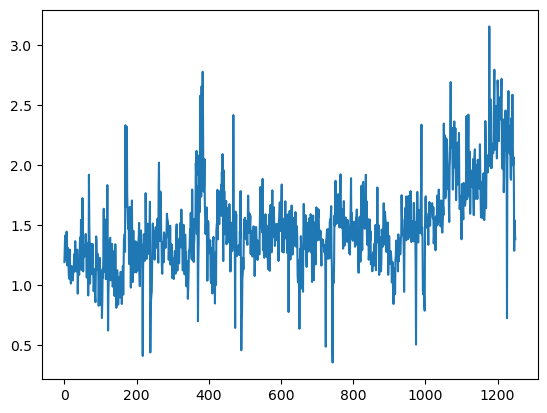

In [8]:
# take a look at volume column
plt.plot(Smarket.iloc[:, 6])
# or plt.plot(Smarket[['Volume']])
plt.show()

# 4.7.2 Logistic regression

In [9]:
y, X = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket, return_type = 'dataframe')
print(y)

      Direction[Down]  Direction[Up]
0                 0.0            1.0
1                 0.0            1.0
2                 1.0            0.0
3                 0.0            1.0
4                 0.0            1.0
...               ...            ...
1245              0.0            1.0
1246              1.0            0.0
1247              0.0            1.0
1248              1.0            0.0
1249              1.0            0.0

[1250 rows x 2 columns]


In [13]:
# we will focus on the up swing of the market, second column y.iloc[:,1] is the up column

logit = sm.Logit(y.iloc[:,1], X)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                0.002074
Time:                        13:40:10   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [14]:
# extract the parameters
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [15]:
# extract the probability of the market going up for the first 10 instances
logit.fit().predict()[0:10] 

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [16]:
# convert the probability to 0 and 1 using threshold
threshold = 0.5 
predict_label = pd.DataFrame(np.zeros(shape=(1250,1)), columns = ['label'])
predict_label.iloc[logit.fit().predict()>threshold] = 1

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [17]:
#  evaluate the TRAINING result using a confusion matrix TP, FP, FN, TN
confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0])

array([[145, 457],
       [141, 507]])

In [18]:
# Calculate the accuracy rate
print(np.mean(y.iloc[:,1] == predict_label.iloc[:,0]))
# or use the confusion matrix to compute the accuracy 
print(confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0]).diagonal().sum()* 1.0 /confusion_matrix(y.iloc[:,1], predict_label.iloc[:,0]).sum())

0.5216
0.5216


# Train-Validation Split

In [19]:
Smarket_2005 = Smarket.query('Year >= 2005')
Smarket_train = Smarket.query('Year < 2005')

In [20]:
# we will use the training dataset to build the logistic regression model 
y_train, X_train = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_train, return_type = 'dataframe')
y_test, X_test = dmatrices('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', Smarket_2005, return_type = 'dataframe')

In [21]:
logit = sm.Logit(y_train.iloc[:,1], X_train)
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Nov 2022   Pseudo R-squ.:                0.001562
Time:                        13:46:35   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.

In [22]:
preds = logit.fit().predict(X_test)
predict_label = pd.DataFrame(np.zeros(shape=(X_test.shape[0],1)), columns = ['label'])
threshold = 0.5
mark = (preds > threshold).reset_index(drop=True)
predict_label.loc[mark] = 1
confusion_matrix(y_test.iloc[:,1], predict_label.iloc[:,0])

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


array([[77, 34],
       [97, 44]])

In [23]:
# out of sample prediction - accuracy rate from confusion matrix
np.mean(y_test.iloc[:,1].reset_index(drop=True)==predict_label.iloc[:,0].reset_index(drop=True)) 


0.4801587301587302

## 4.7.3 Linear Discriminant Analysis

In [24]:
y_train.iloc[:,1].unique() # check binary outcome variable

array([1., 0.])

In [25]:
# the training process 
sklearn_lda = LDA(n_components=1) #creating a LDA object
lda = sklearn_lda.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) #learning the projection matrix
X_lda = lda.transform(X_train.iloc[:,1:3]) #using the model to project X 
X_labels = lda.predict(X_train.iloc[:,1:3]) #gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train.iloc[:,1:3]) #the probability of each sample to belong to each class

In [29]:
# testing step 
X_test_labels =lda.predict(X_test.iloc[:,1:3])
X_test_prob = lda.predict_proba(X_test.iloc[:,1:3]) 
print(X_test_prob[0:5,:])

[[0.49017925 0.50982075]
 [0.4792185  0.5207815 ]
 [0.46681848 0.53318152]
 [0.47400107 0.52599893]
 [0.49278766 0.50721234]]


In [30]:
# get the accuracy of the test set using default threshold
np.mean(y_test.iloc[:,1]==X_test_labels) 

0.5595238095238095

## 4.7.4 Quadratic Discriminant Analysis

In [32]:
sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
qda = sklearn_qda.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) #learning the projection matrix
X_labels = qda.predict(X_train.iloc[:,1:3]) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train.iloc[:,1:3]) #the probability of each sample to belong to each class

X_test_labels=qda.predict(X_test.iloc[:,1:3])
X_test_prob = qda.predict_proba(X_test.iloc[:,1:3]) 

print(np.mean(y_test.iloc[:,1]==X_test_labels) ) #accuracy rate

0.5992063492063492


In [34]:
dir(qda)

print(qda.means_)
print(qda.covariance_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]]), array([[ 1.51700576, -0.02787349],
       [-0.02787349,  1.49026815]])]


## 4.7.5 Naive Bayes

In [37]:
NB_class = NB()
NB_class.fit(X_train.iloc[:,1:3], y_train.iloc[:,1])
X_test_labels=NB_class.predict(X_test.iloc[:,1:3])
X_test_prob = NB_class.predict_proba(X_test.iloc[:,1:3]) 
print(np.mean(y_test.iloc[:,1]==X_test_labels))

#dir(NB_class) # use dir command to check what Naive Bayes classifier has

0.5952380952380952


## 4.7.6 K-Nearest Neighbors

In [38]:
neigh = KNN(n_neighbors= 4) # use n_neighbors to change the # of tune the performance of KNN
KNN_fit = neigh.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) #learning the projection matrix
X_test_labels=KNN_fit.predict(X_test.iloc[:,1:3])
X_test_prob = KNN_fit.predict_proba(X_test.iloc[:,1:3]) 
print(np.mean(y_test.iloc[:,1]==X_test_labels))

#dir(neigh) # use dir command to check what KNN offers

0.5158730158730159


## 4.7.7 Possion Regression

In [40]:
Bikeshare = pd.read_csv('../data/Bikeshare.csv', header=0)
print(Bikeshare.head())
print(Bikeshare.shape)

   season mnth  day  hr  holiday  weekday  workingday weathersit  temp  \
0       1  Jan    1   0        0        6           0      clear  0.24   
1       1  Jan    1   1        0        6           0      clear  0.22   
2       1  Jan    1   2        0        6           0      clear  0.22   
3       1  Jan    1   3        0        6           0      clear  0.24   
4       1  Jan    1   4        0        6           0      clear  0.24   

    atemp   hum  windspeed  casual  registered  bikers  
0  0.2879  0.81        0.0       3          13      16  
1  0.2727  0.80        0.0       8          32      40  
2  0.2727  0.80        0.0       5          27      32  
3  0.2879  0.75        0.0       3          10      13  
4  0.2879  0.75        0.0       0           1       1  
(8645, 15)


In [46]:
# first build a linear regression model
lm_bikeshare = smf.ols('bikers ~ mnth + hr + workingday + temp + weathersit', data = Bikeshare).fit()
lm_bikeshare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:14:25   Log-Likelihood:                -52635.
No. Observations:                8645   AIC:                         1.053e+05
Df Residuals:                    8627   BIC:                         1.054e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -101.1052      7.269    -13.910      0.000    -115.353     -86.857
mnth[T.Aug]                     -33.1123      6.410     -5.166      0.000     -45.677     -20.547
mnth[T.Dec]                      34.7242      5.908      5.878      0.000      23.144      46.305
mnth[T.Feb]                       5.3621      6.279      0.854      0.393      -6.946      17.670
mnth[T.Jan]                      15.8861      6.731      2.360      0.018       2.691      29.081
mnth[T.July]                    -52.1488      6.769     -7.704      0.000     -65.417     -38.881
mnth[T.June]                    -16.8499      6.343     -2.656      0.008     -29.284      -4.416
mnth[T.March]                     4.4564      5.906      0.755      0.451      -7.121      16.034
mnth[T.May]                      10.3534      5.757      1.798      0.072      -0.932      21.639
mnth[T.Nov]                      32.8573      5.705      5.759      0.000      21.674      44.041
mnth[T.Oct]                      34.6532      5.591      6.198      0.000      23.694      45.613
mnth[T.Sept]                     -3.0572      5.930     -0.516      0.606     -14.681       8.567
weathersit[T.cloudy/misty]      -10.5972      2.729     -3.884      0.000     -15.946      -5.249
weathersit[T.heavy rain/snow]   -62.2356    106.855     -0.582      0.560    -271.698     147.227
weathersit[T.light rain/snow]   -58.2213      4.133    -14.088      0.000     -66.322     -50.120
hr                                6.6441      0.174     38.286      0.000       6.304       6.984
workingday                       -1.1738      2.489     -0.472      0.637      -6.053       3.705
temp                            356.0133     13.007     27.370      0.000     330.516     381.511
==============================================================================
Omnibus:                     1288.401   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2017.317
Skew:                           1.044   Prob(JB):                         0.00
Kurtosis:                       4.113   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# RMSE
np.sqrt(((lm_bikeshare.fittedvalues - Bikeshare.bikers)**2).sum()/len(Bikeshare.bikers))

106.65534360848791

In [45]:
# instead of use .ols(), we use .glm()
glm_bikeshare = smf.glm('bikers ~ mnth + hr + workingday + temp + weathersit', data = Bikeshare, family=sma.families.Poisson()).fit()
glm_bikeshare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4404e+05
Date:                Mon, 14 Nov 2022   Deviance:                   6.3504e+05
Time:                        14:14:14   Pearson chi2:                 6.83e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.0118      0.006    476.777      0.000       2.999       3.024
mnth[T.Aug]                      -0.2288      0.005    -48.719      0.000      -0.238      -0.220
mnth[T.Dec]                       0.2981      0.005     59.511      0.000       0.288       0.308
mnth[T.Feb]                      -0.1015      0.006    -17.160      0.000      -0.113      -0.090
mnth[T.Jan]                      -0.1450      0.007    -21.388      0.000      -0.158      -0.132
mnth[T.July]                     -0.3777      0.005    -76.183      0.000      -0.387      -0.368
mnth[T.June]                     -0.1502      0.005    -32.493      0.000      -0.159      -0.141
mnth[T.March]                    -0.0312      0.005     -5.833      0.000      -0.042      -0.021
mnth[T.May]                       0.0508      0.004     11.690      0.000       0.042       0.059
mnth[T.Nov]                       0.2845      0.005     61.782      0.000       0.276       0.294
mnth[T.Oct]                       0.2667      0.004     61.683      0.000       0.258       0.275
mnth[T.Sept]                     -0.0065      0.004     -1.473      0.141      -0.015       0.002
weathersit[T.cloudy/misty]       -0.0308      0.002    -14.233      0.000      -0.035      -0.027
weathersit[T.heavy rain/snow]    -0.6455      0.167     -3.871      0.000      -0.972      -0.319
weathersit[T.light rain/snow]    -0.4728      0.004   -116.934      0.000      -0.481      -0.465
hr                                0.0507      0.000    351.836      0.000       0.050       0.051
workingday                       -0.0128      0.002     -6.573      0.000      -0.017      -0.009
temp                              2.5639      0.010    257.622      0.000       2.544       2.583
=================================================================================================
"""

In [47]:
#RMSE
np.sqrt(((glm_bikeshare.fittedvalues - Bikeshare.bikers)**2).sum()/len(Bikeshare.bikers))

107.73434730516972